# Guided Project: Visualizing Earnings Based on College Major

## Table of Content

* [Introduction](#introduction)
* [Setup](#setup)
* [Scatter Plots](#scatter-plots)
* [Histograms](#histograms)
* [Scatter Matrix Plots](#scatter-matrix-plots)
* [Bar Plots](#bar-plots)

## Introduction <a name="introduction"></a>

In this guided project, we'll explore how using the pandas plotting functionality along with the Jupyter notebook interface allows us to explore data quickly using visualizations. You can find the solutions to this guided project [here](https://github.com/dataquestio/solutions/blob/master/Mission146Solutions.ipynb).

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

- **Rank** - Rank by median earnings (the dataset is ordered by this column).
- **Major_code** - Major code.
- **Major** - Major description.
- **Major_category** - Category of major.
- **Total** - Total number of people with major.
- **Sample_size** - Sample size (unweighted) of full-time.
- **Men** - Male graduates.
- **Women** - Female graduates.
- **ShareWomen** - Women as share of total.
- **Employed** - Number employed.
- **Median** - Median salary of full-time, year-round workers.
- **Low_wage_jobs** - Number in low-wage service jobs.
- **Full_time** - Number employed 35 hours or more.
- **Part_time** - Number employed less than 35 hours.

Using visualizations, we can start to explore questions from the dataset like:

- Do students in more popular majors make more money?
    - Using scatter plots
- How many majors are predominantly male? Predominantly female?
    - Using histograms
- Which category of majors have the most students?
    - Using bar plots

We'll explore how to do these and more while primarily working in pandas. Before we start creating data visualizations, let's import the libraries we need and remove rows containing null values.

## Setup <a name="setup"></a>

In [1]:
# import libraries
import pandas as pd
import matplotlib

# plots are displayed inline
%matplotlib inline 

### Read dataset and start exploring the data

In [2]:
# read dataset into a DataFrame
recent_grads = pd.read_csv('recent-grads.csv', delimiter=',')

In [3]:
# first row
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [4]:
# beginning
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [5]:
# end of data
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [6]:
# summary statistics of all numeric columns
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [7]:
# overview
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

**Observations**
- Data is ordered by the rank column corresponding to the median earnings
- Top 5 majors are in Engineering
- Bottom 5 majors are in Biology & Life Science, Psychology & Social Work, Education
- Share of women in the top 5 majors (Engineering) is low with the highest being 34% in Chemical Engineering. The other 4 are less than 20%. In the bottom 5 majors, share of women is at least 64% with the last ranked major (Library Science) having almost 88% women
- Three columns have missing data - Total, Men, Women, ShareWomen. Will have to take a closer look into this

### Drop rows with missing values
Matplotlib expects that columns of values we pass in have matching lengths and missing values will cause matplotlib to throw errors.

In [8]:
raw_data_count = recent_grads.shape[0]
print("There are {0} rows in this dataset".format(raw_data_count))

There are 173 rows in this dataset


In [9]:
recent_grads = recent_grads.dropna()

In [10]:
cleaned_data_count = recent_grads.shape[0]
print("There are {0} rows in this dataset".format(cleaned_data_count))

There are 172 rows in this dataset


In [11]:
# overview
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 172
Data columns (total 21 columns):
Rank                    172 non-null int64
Major_code              172 non-null int64
Major                   172 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          172 non-null object
ShareWomen              172 non-null float64
Sample_size             172 non-null int64
Employed                172 non-null int64
Full_time               172 non-null int64
Part_time               172 non-null int64
Full_time_year_round    172 non-null int64
Unemployed              172 non-null int64
Unemployment_rate       172 non-null float64
Median                  172 non-null int64
P25th                   172 non-null int64
P75th                   172 non-null int64
College_jobs            172 non-null int64
Non_college_jobs        172 non-null int64
Low_wage_jobs          

With df.dropna(), we were able to drop the row with missing values. We can now confirm all columns have data.

---

## Scatter Plots <a name="scatter-plots"></a>
Most of the plotting functionality in pandas is contained within the [DataFrame.plot()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) method. When we call this method, we specify the data we want plotted as well as the type of plot. We use the `kind` parameter to specify the type of plot we want. We use `x` and `y` to specify the data we want on each axis. [DataFrame.plot documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html).

```python
recent_grads.plot(x='Sample_size', y='Employed', kind='scatter')
```

The DataFrame.plot() method has a few parameters we can use for tweaking the scatter plot:

```python
recent_grads.plot(x='Sample_size', y='Employed', kind='scatter', title='Employed vs. Sample_size', figsize=(5,10))
```

We can access the underlying matplotlib Axes object by assigning the return value to a variable:

```python
ax = recent_grads.plot(x='Sample_size', y='Employed', kind='scatter')
ax.set_title('Employed vs. Sample_size')
```

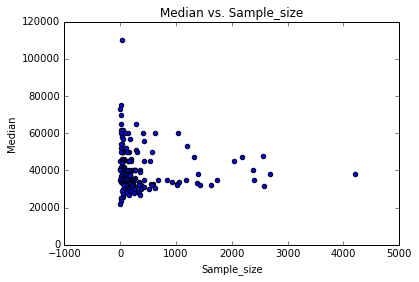

In [12]:
# Median vs. Sample_size
ax = recent_grads.plot(x='Sample_size', y='Median', kind='scatter')
ax.set_title("Median vs. Sample_size")

There is a huge cluster of points in the bottom left side of the plot. This corresponds to most majors having very small sample sizes (less than 500) as well as low median salaries (20,000 - 40,000).


Most sample sizes were less than 1000, if not 500. There were a handful between 2000 and 3000 and one outlier had more than 4000.

In terms of median salary, only one sample size had larger than 80,000 with most being in the 20,000 to 40,000 salary range. There were a few majors in the 60,000 to 80,000 salary range.

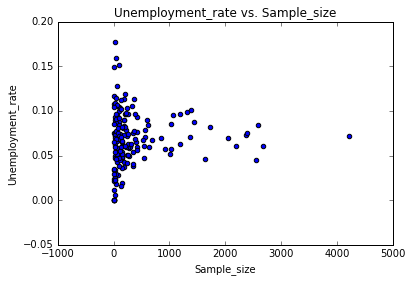

In [13]:
# Unemployment_rate vs. Sample_size
ax1 = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
ax1.set_title("Unemployment_rate vs. Sample_size")

We see in this plot the low number of sample sizes for the majority of majors skews most points to the left side of the plot. It looks similar to the previous plot but has a few key differences.

There is a greater distribution across unemployment_rate, with the majority being in the 0.05 - 0.10 unemployment rate range. There are a handful with over 0.15 unemployment rate.

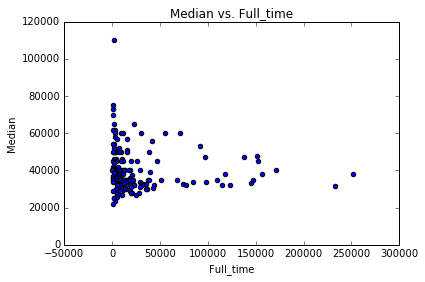

In [14]:
# Median vs. Full_time
ax2 = recent_grads.plot(x='Full_time', y='Median', kind='scatter')
ax2.set_title("Median vs. Full_time")

One major had a small number of people working in full time positions while being paid the highest (almost 120,000).

Majority of majors are in the bottom left side of the plot with low wages (20,000 - 40,000) and low numbers of full time positions.

There were two majors with around 250,000 full time positions making 20,000 - 40,000.

A few majors are in the 60,000 - 80,000 salary range.

So there are a few lucrative majors with low numbers of full time employed workers making more than 60,000. There are lots of majors with high numbers of full time employed workers (50,000+) making 20,000 to 60,000. There are huge number of majors with low numbers of full time employed workers (less than 50,000) making 20,000 to 40,000.

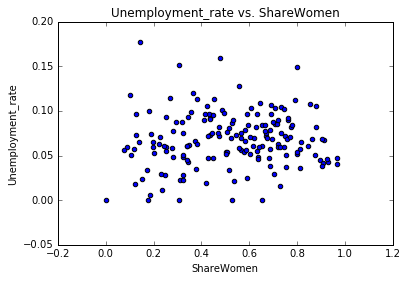

In [15]:
# Unemployment_rate vs. ShareWomen
ax3 = recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')
ax3.set_title("Unemployment_rate vs. ShareWomen")

There is one major where the share of woman is 0 and therefore the unemployment rate is also 0. This major is exclusively male. I wonder what major that is. Also it could be more than one. I will take a look at this afterwards.

There is no correlation or pattern here. The scatter plot is spread out all over, mostly in the middle between unemployment rate and share of women.

A few outliers do exist. There is of course the 0, 0 point at the bottom left indcating no women in that major. In addition, there is one major with a low number of women (less than 0.2) yet with a high unemployment rate (almost 0.20). Assuming the unemployment rate includes both males and females, we are not able to conclude if this means high unemployment rates exclusively for women.

There are also a couple of majors with share of women in the ~0.3 to 0.5 range that have unemployment rates of around 0.15.

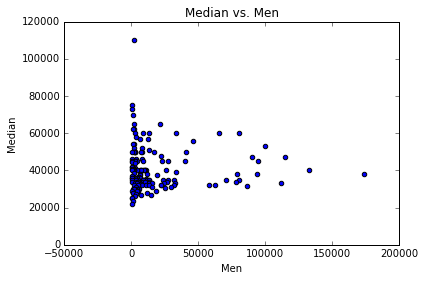

In [16]:
# Median vs. Men
ax4 = recent_grads.plot(x='Men', y='Median', kind='scatter')
ax4.set_title("Median vs. Men")

Mirroring some of our previous plots, this plot also shows there are a few men making salaries of 60,000 or more with one group making almost 120,000. Most majors are in the bottom left side of the plot representing low wages (20,000 - 40,0000) and low number of men (0 - 50,000). This group is clustered even closer to the 0 number of men.

There are several majors with lots of men (50,000+) making 20,000 - 60,000 in salary. One major employs over 150,000 people with salaries slightly under 40,000.

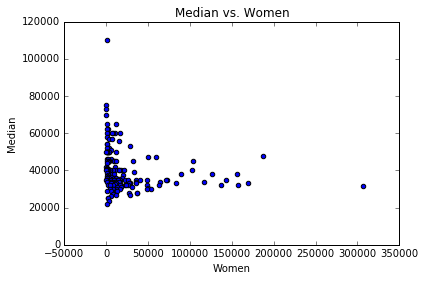

In [17]:
# Median vs. Women
ax5 = recent_grads.plot(x='Women', y='Median', kind='scatter')
ax5.set_title("Median vs. Women")

This plot is very similar to the Men vs. Median plot. Most majors consist of few women (less than 50,000) making low wages (20,000 - 40,000). There are few majors with few women making over 60,000 with one making almost 120,000.

There are several majors which employ lots of women (50,000 - 200,000) with 20,000 - 60,000 salary ranges. One outlier major employs over 300,000 women at a salary slightly under 40,000.

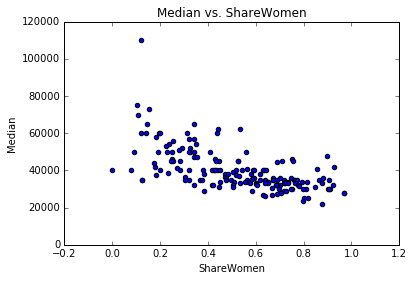

In [18]:
# Median vs. ShareWomen - additional chart to answer 2nd question
ax6 = recent_grads.plot(x='ShareWomen', y='Median', kind='scatter')
ax6.set_title("Median vs. ShareWomen")

The one outlier consists of few women (less than 0.2) but the highest wage of almost 120,000.

This plot shows a weak negative correlation between share of women and median salary. There is a bit of a downward slope in that as the share of women in a major increases, the overall salaries go downwards. It is weak because there are several exceptions. There are a handful of majors with low numbers of women that also have low salaries. There are a handful of majors with around half being women that have salaries of around 60,000.

### Questions

**Do students in more popular majors make more money?**  
No, students in more popular majors make less money. We saw consistently that a few majors made high wages of over 60,000 while most majors were in the 20,000 to 40,000 salary range. These high wage majors tended to have fewer people as well.

**Do students that majored in subjects that were majority female make more money?**
No students that majored in subjects that were majority female made less money. The plot _Median vs. ShareWomen_ demonstrates that as the number of females in a major increased, the salaries tended to decrease overall.

**Is there any link between the number of full-time employees and median salary?**  
There is a possible weak link. At low numbers of full-time employees, we found most majors had low median wages, but there were a few majors with high median wages. This by itself would show there is no link - we see both high and low wages for low numbers of full-time employment. On the other hand, there were majors that had large numbers of full-time employees with lower median wages. 

There must be other external factors that are coming into play. E.g. If there is a demand for that type of work and not enough people able to do the job, this will lead to higher median wages as employers try to attract and retain people. So depending on the major, low number of full-time employees may result in higher median wages. This can be driven by supply and demand.

-----

## Histograms <a name="histograms"></a>
To explore the distribution of values in a column, we can select it from the DataFrame, call [Series.plot()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html), and set the `kind` parameter to `hist`:

```python
recent_grads['Sample_size'].plot(kind='hist')
```

We use `Series.plot()` to plot a specific column and `DataFrame.plot()` to generate plots that use values from multiple columns.

If you've looked at the documentation for Series.plot(), you'll notice there is no way to control the binning strategy for histograms. Luckily, we can control the binning strategy of a histogram using [Series.hist()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.hist.html), which contains parameters specific to customizing histograms:

```python
recent_grads['Sample_size'].hist(bins=25, range=(0,5000))
```

#### Sample_Size

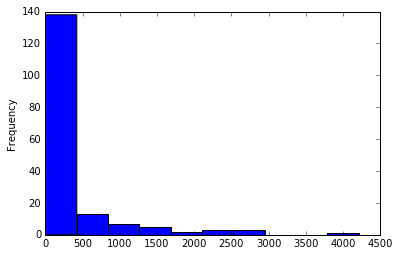

In [19]:
# Sample_size
recent_grads['Sample_size'].plot(kind='hist')

Almost 140 majors had sample sizes in the 0 - 450 range. Let's dig a bit deeper to find out where most sample sizes came from:

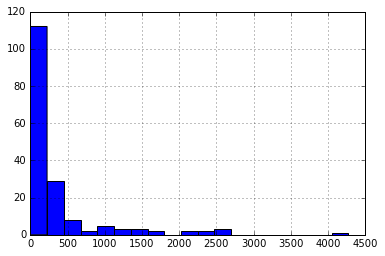

In [20]:
# Sample_size with 20 bins, range of 0 - 4500
recent_grads['Sample_size'].hist(bins=20, range=(0, 4500))

Around 130 majors had sample sizes in the 0 - 225 range. Let's continue to dig deeper:

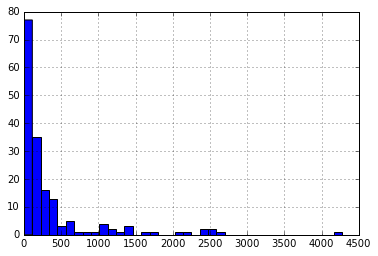

In [21]:
# Sample_size with 45 bins, range of 0 - 4500
recent_grads['Sample_size'].hist(bins=40, range=(0, 4500))

Setting our histogram to 45 bins with a range of 0 - 4500, we can see around 75 majors had sample sizes in the 0 - 100 range. Let's dig a bit deeper: 

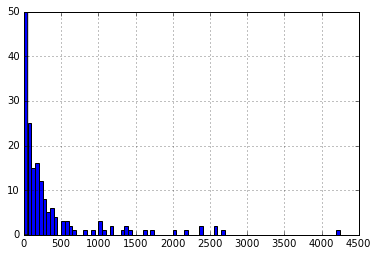

In [22]:
# Sample_size with 90 bins, range of 0 - 4500
recent_grads['Sample_size'].hist(bins=90, range=(0, 4500))

50 majors had sample sizes in the 0 - 50 range. The next most frequent range was 50 - 100 with 25 majors. All other ranges had less than 20 majors.

So 75 majors out of 172 (~43%) had sample sizes of 100 or less. Another 55 (130 - 75) were in the 100 - 225 sample size range. Combined, they account for 64% of majors. Therefore, over 60% of majors had sample sizes less than 225. Given that several majors had sample sizes of 1000 or more, it is significant that most majors had relatively small sample sizes.

#### Median Salary

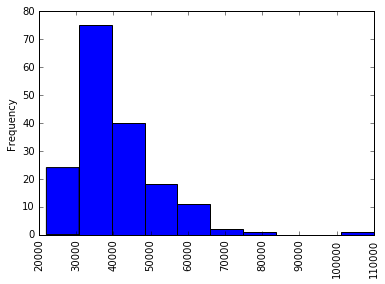

In [23]:
# Median
recent_grads['Median'].plot(kind='hist', rot=90)

Majority of majors had median salaries of 30,000 to 40,000.

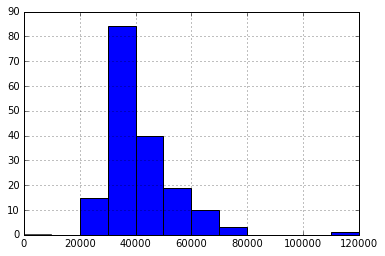

In [24]:
# Median with 12 bins, 0 - 120,000 range
recent_grads['Median'].hist(bins=12, range=(0, 120000))

In the plot above, each bin covers a range of 10,000. Most majors make median salaries in the 30,000 to 40,000 range while the least number of majors make median salaries in the 110,000 to 120,000 range.

Oddly, we observe a slight blip in the 0 - 10,000 salary range. Checking below, we can see the minimum salary is 22,000.

In [25]:
recent_grads['Median'].describe()

count       172.000000
mean      40076.744186
std       11461.388773
min       22000.000000
25%       33000.000000
50%       36000.000000
75%       45000.000000
max      110000.000000
Name: Median, dtype: float64

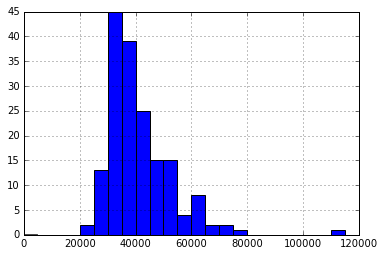

In [26]:
# Median with 24 bins, 0 - 120,000 range
recent_grads['Median'].hist(bins=24, range=(0, 120000))

In the plot above, each bin covers a range of 5,000. Again, we see most majors are in the 30,000 to 35,000 median salary range (45) followed closely by the 35,000 to 40,000 median salary range (~ 38). Coming up third, 25 majors are in the 40,000 to 45,000 median salary range. All other salary ranges contain 15 majors or less.

Adding up the 3 most frequent median salary ranges for majors:  

$$45 + 38 + 25 = 108$$ 
$$(108 / 172) * 100 = 62.8\%$$

We observe over half of all majors ($63\%$) are making 30,000 to 45,000 in median salary.

#### Employed

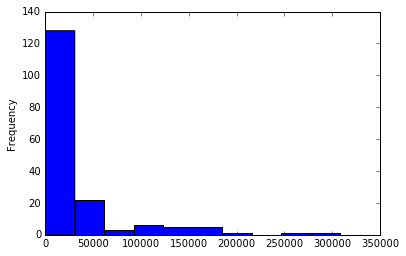

In [27]:
# Employed
recent_grads['Employed'].plot(kind='hist')

We observe the majority of majors (over 120 out of 172) are in the first bin with employements below 35,000. All other employment ranges have 20 or less majors. Let's dig in deeper to see how the first bin breaks down.

In [28]:
recent_grads['Employed'].describe()

count       172.00000
mean      31355.80814
std       50777.42865
min           0.00000
25%        3734.75000
50%       12031.50000
75%       31701.25000
max      307933.00000
Name: Employed, dtype: float64

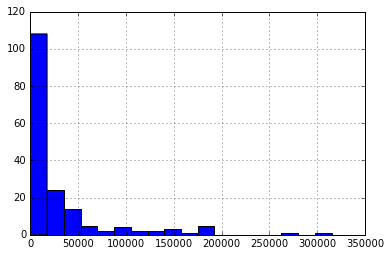

In [29]:
# Employed with 20 bins, 0 - 350,000 range, 17,500 range per bin
recent_grads['Employed'].hist(bins=20, range=(0, 350000))

We observe most majors (~110) are still in the first bin representing up to 17,500 employeed graduates.

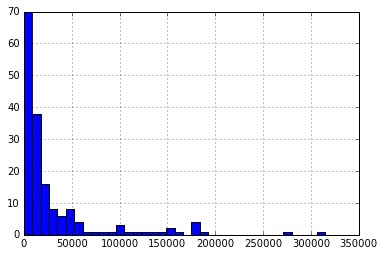

In [30]:
# Employed with 40 bins, 0 - 350,000 range, 8,750 range per bin
recent_grads['Employed'].hist(bins=40, range=(0, 350000))

We observe most majors (70) are in the first bin representing up to 8,750 employeed graduates.

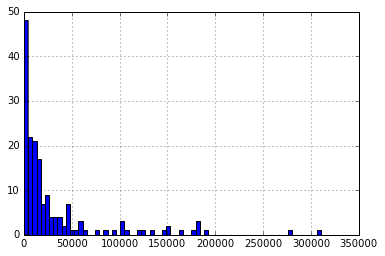

In [31]:
# Employed with 80 bins, 0 - 350,000 range, 4,375 range per bin
recent_grads['Employed'].hist(bins=80, range=(0, 350000))

We observe the most frequent range (~48 or 27%) is still in the first bin representing up to 4,375 employeed graduates.

So there are lots of majors that employ relatively small number of graduates. There are fewer majors which employ relatively large numbers of graduates.

#### Full Time

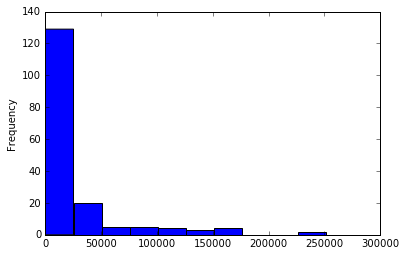

In [32]:
# Full_time
recent_grads['Full_time'].plot(kind='hist')

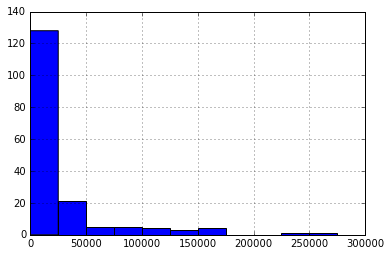

In [33]:
# Full Time with 12 bins, 0 - 300,000 range, 25,000 range per bin
recent_grads['Full_time'].hist(bins=12, range=(0,300000))

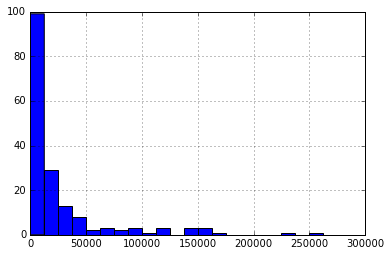

In [34]:
# Full Time with 24 bins, 0 - 300,000 range, 12,500 range per bin
recent_grads['Full_time'].hist(bins=24, range=(0,300000))

#### Share of Women

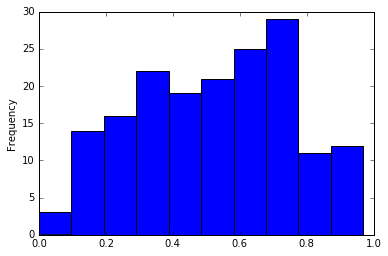

In [35]:
# ShareWomen
recent_grads['ShareWomen'].plot(kind='hist')

In [36]:
recent_grads['ShareWomen'].describe()

count    172.000000
mean       0.522223
std        0.231205
min        0.000000
25%        0.336026
50%        0.534024
75%        0.703299
max        0.968954
Name: ShareWomen, dtype: float64

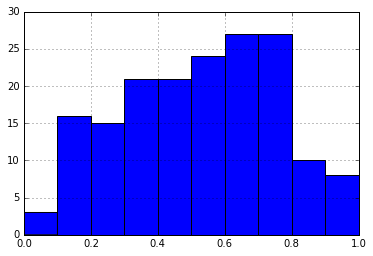

In [37]:
# ShareWomen with 10 bins, 0 - 1 range, 0.1 range per bin
recent_grads['ShareWomen'].hist(bins=10, range=(0, 1))

We observe most majors have share of women between 50 - 80%. These range consists of over 50 majors.

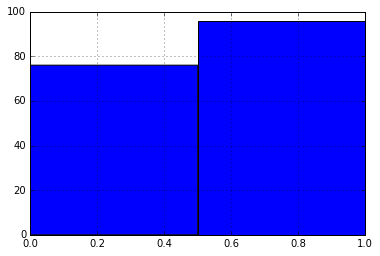

In [38]:
# ShareWomen with 10 bins, 0 - 1 range, 0.1 range per bin
recent_grads['ShareWomen'].hist(bins=2, range=(0, 1))

There are a larger number of majors whose graduates are at least 50% female. Almost 100 majors have at least 50% women. This represents almost 60% of all majors.

#### Unemployment rate

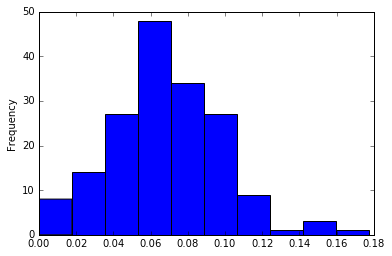

In [39]:
# Unemployment_rate
recent_grads['Unemployment_rate'].plot(kind='hist')

#### Men

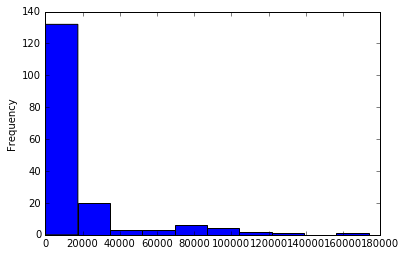

In [40]:
# Men
recent_grads['Men'].plot(kind='hist')

#### Women

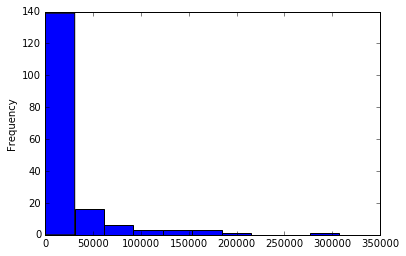

In [41]:
# Women
recent_grads['Women'].plot(kind='hist')

### Questions

**What percentage of majors are predominantly male? Predominantly female?**  
~40% of majors are predominantly male, while ~60% of majors are predominantly female. The '_ShareWomen_' histogram with 2 bins clearly shows there are a larger number of majors with at least 50% female graduates.

**What's the most common median salary range?**  
The most common median salary range is 30,000 to 35,000 with 45 majors out of 172 making this salary range.


**NOTE**: In the interest of time, moving forward to next sections. Should come back and look at more granular histograms for the latter columns.

-----

## Scatter Matrix Plots <a name="scatter-matrix-plots"></a>
In the previous 2 steps, we created individual scatter plots to visualize potential relationships between columns and histograms to visualize the distributions of individual columns. A **scatter matrix plot** combines both scatter plots and histograms into one grid of plots and allows us to explore potential relationships and distributions simultaneously. A scatter matrix plot consists of $n$ by $n$ plots on a grid, where $n$ is the number of columns, the plots on the diagonal are histograms, and the non-diagonal plots are scatter plots.

Because scatter matrix plots are frequently used in the exploratory data analysis, pandas contains a function named `scatter_matrix()` that generates the plots for us. This function is part of the `pandas.plotting` module and needs to be imported separately. To generate a scatter matrix plot for 2 columns, select just those 2 columns and pass the resulting DataFrame into the `scatter_matrix()` function.

```python
scatter_matrix(recent_grads[['Women', 'Men']], figsize=(10,10))
```

While passing in a DataFrame with 2 columns returns a 2 by 2 scatter matrix plot (4 plots total), passing in one with 3 returns a 3 by 3 scatter matrix plot (9 plots total). This means that the number of plots generated scales exponentially by a factor of 2, not linearly. If you increase the number of columns to 4 or more, the resulting grid of plots becomes unreadable and difficult to interpret (even if you increase the plotting area using the `figsize` parameter).

If you want to read more about the parameters the function accepts, head to the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.plotting.scatter_matrix.html).

In [42]:
# import library
from pandas.plotting import scatter_matrix

#### Sample_size and Median Salary Scatter Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d22dbe4e0>,
      dtype=object)

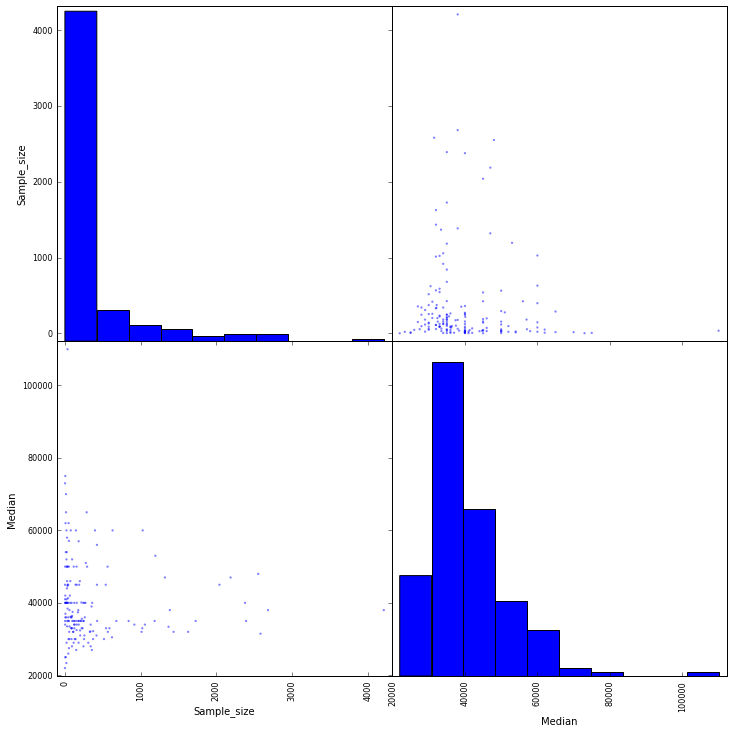

In [43]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(12, 12))

#### Sample_size, Median Salary and Unemployment Rate Scatter Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d22abc668>,
      dtype=object)

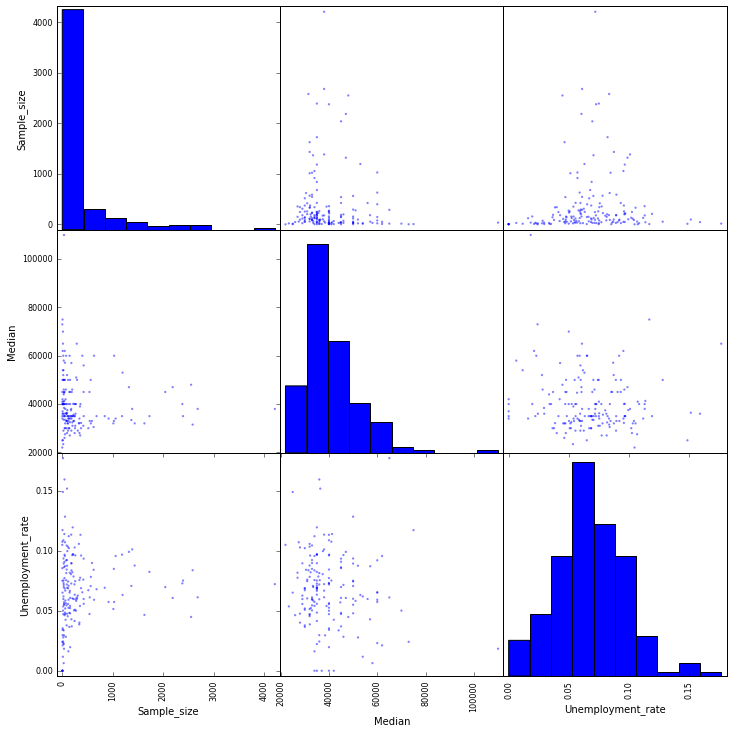

In [44]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']],
               figsize=(12, 12))

#### Share of Women, Median Salary Scatter Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d22821860>,
      dtype=object)

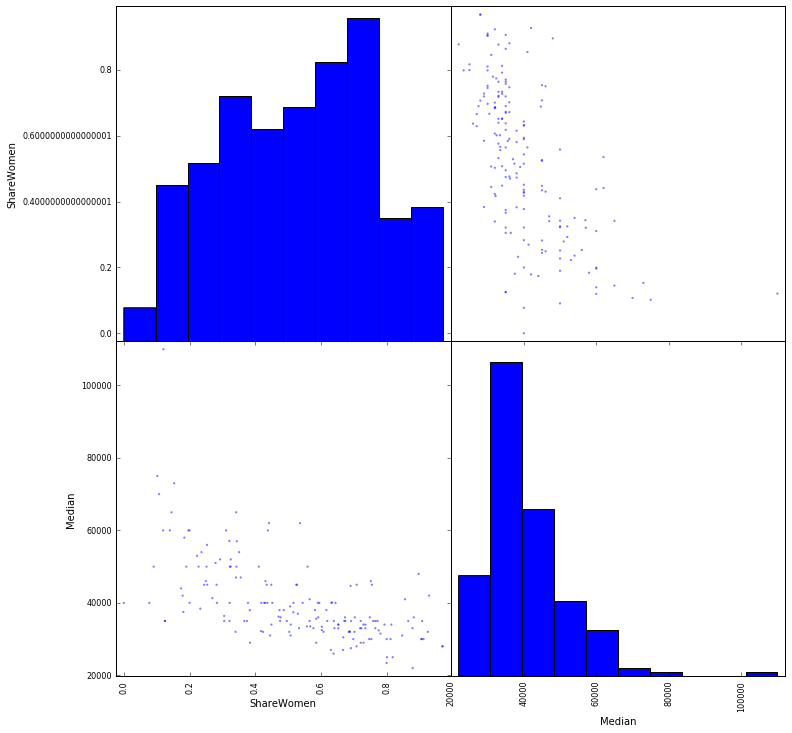

In [45]:
scatter_matrix(recent_grads[['ShareWomen', 'Median']], figsize=(12, 12))

#### Full Time, Median Salary Scatter Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d22751978>,
      dtype=object)

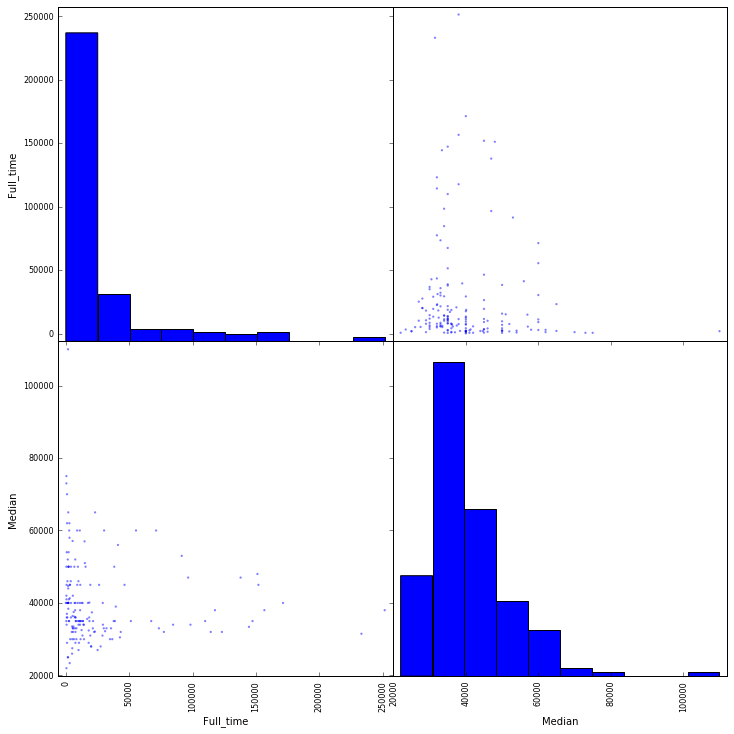

In [46]:
scatter_matrix(recent_grads[['Full_time', 'Median']], figsize=(12, 12))

#### Total, ShareWomen Scatter Matrix

In [47]:
recent_grads.columns

Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d20a7ff28>,
      dtype=object)

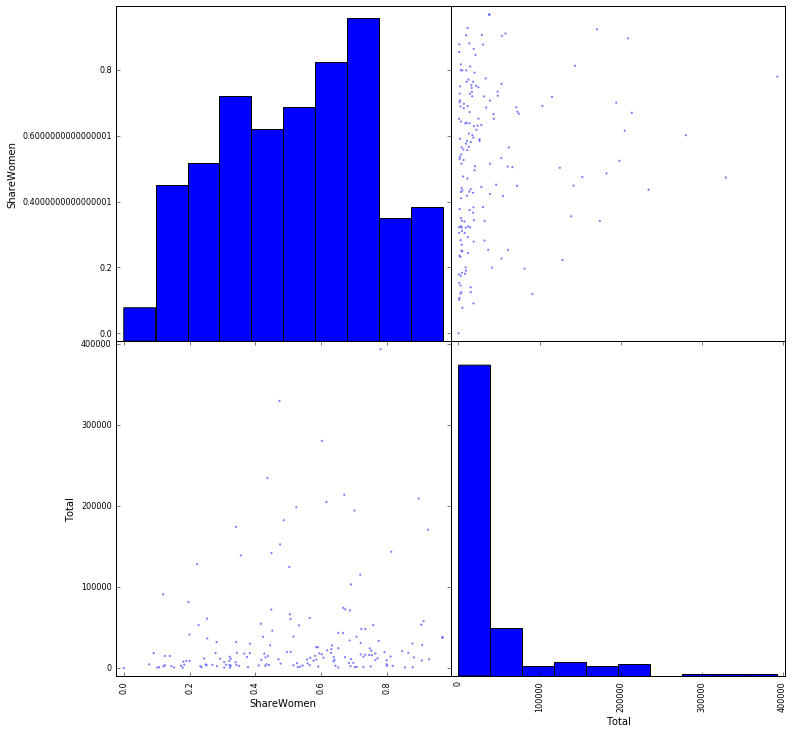

In [49]:
scatter_matrix(recent_grads[['ShareWomen', 'Total']], figsize=(12, 12))

### Questions
Use the plots to explore the following questions:

**Do students in more popular majors make more money?**  
No, students in more popular majors don't make more money. The _Sample size, Median Salary_ Scatter Matrix clearly shows that for the larger the sample sizes (indicating more popularity of a major), the lower the median salary is. Only a small number of sample sizes had higher salaries with one in particular all the way at the top of the median salary. Median Salary of 60,000 or more was reported by sample sizes of 1000 or less. Some of the larger sample sizes (2000 +) had median salaries around 40,000.

**Do students that majored in subjects that were majority female make more money?**  
No, students that majored in subjects that were majority female didn't make more money. The _Share of Women, Median Salary_ Scatter Matrix shows an almost inverse linear relationship between Median Salary and Share of Women. This is clearly seen in the bottom left scatter plot of Median Salary vs. Share of Women. Although there are anomalies (both high and low salaries for low share of women), there is a general trend of Median Salary decreasing as Share of Women increases. In addition, the top right scatter plot of Share of Women vs. Median Salary more clearly shows that the majors with majority women tended to make less money.

**Is there any link between the number of full-time employees and median salary?**  
There is no link between the number of full-time employees and median salary. In the _Median Salary vs. Full Time Scatter Plot_, the majority of of majors are in the lower quadrant representing low Median Wage and low numbers of Full Time Employees. On either extremes, we do observe one major that has the highest Median Salary of over 100,000 with low numbers of Full Time Employees; and we do observe two majors that have around 250,000 Full Time Employees with Median Salaries of less than 40,000. There are several majors with Full Time Employees in the 100,000 - 200,000 range with Median Salaries around 30,000 - 60,000. So there is no linear or inverse linear relationship between these two - there are other factors in play.

**What percent of majors are predominantly male? Predominantly female?**  
~40% of majors are predominantly male, while ~60% of majors are predominantly female. The 'ShareWomen' histogram with 2 bins clearly shows there are a larger number of majors with at least 50% female graduates.

**What's the most common median salary range?**  
The most common median salary range is 30,000 - 40,000.

-----

## Bar Plots <a name="bar-plots"></a>
To create bar plots in matplotlib, we had to specify many aspects of the bar plot ourselves. We had to specify the locations, labels, lengths, and widths of the bars. When creating bar plots using pandas, we only need specify the data we want the bars to represent and the labels for each bar. The following code returns a bar plot of the first 5 values in the Women column:

```python
recent_grads[:5]['Women'].plot(kind='bar')
```

By default, pandas will use the default labels on the x-axis for each bar (1 to n) from matplotlib. If we instead use the [DataFrame.plot.bar()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.bar.html) method, we can use the x parameter to specify the labels and the y parameter to specify the data for the bars:

```python
recent_grads[:5].plot.bar(x='Major', y='Women')
```

In [55]:
recent_grads.columns

Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')

#### Share of Women
Use bar plots to compare the percentages of women (ShareWomen) from the first 10 rows and last 10 rows of a sorted dataframe.

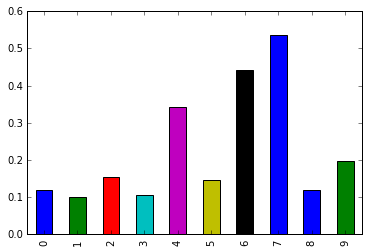

In [51]:
recent_grads[:10]['ShareWomen'].plot(kind='bar')

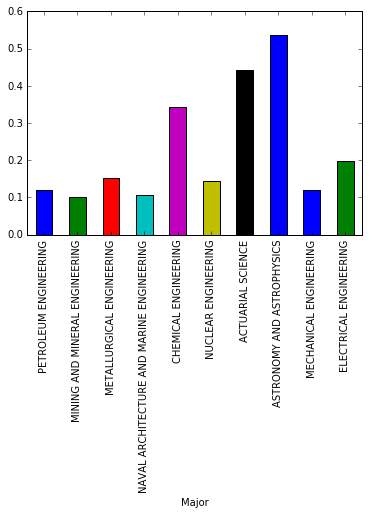

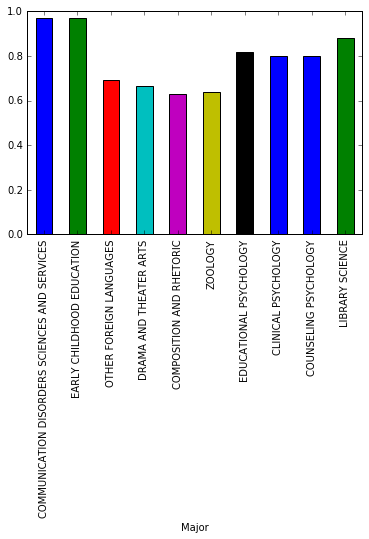

In [61]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
recent_grads[-10:].plot.bar(x='Major', y='ShareWomen', legend=False)

**Observation:**  
The percentages of women in Engineering is very low. In the first plot, the highest percentage of women is around 0.5% in Astronomy and Astrophysics. Chemical Engineering is the only Engineering major with percentgage of women higher than 0.3%.

On the other hand, Education, Arts, Psychology, Life Science majors have the highest percentage of women. At the low end, women represent 60% in Zoology and Composition and Rhetoric majors. On the high end, women make up 90% of Early Childhood Education, Communication Disorders Sciences and Services majors.

#### Unemployment
Use bar plots to compare the unemployment rate (Unemployment_rate) from the first 10 rows and last 10 rows of a sorted dataframe.

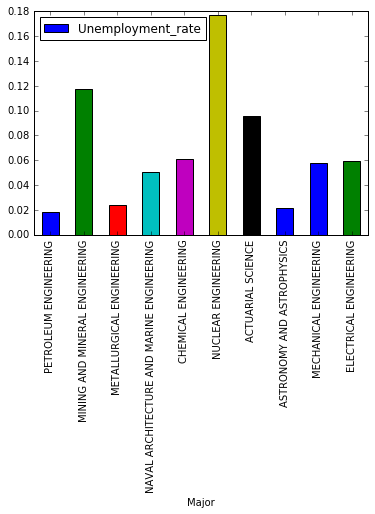

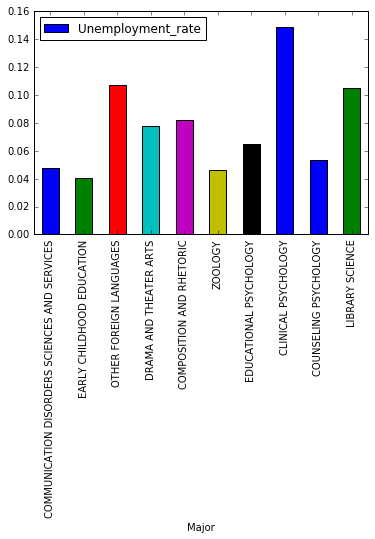

In [62]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate')
recent_grads[-10:].plot.bar(x='Major', y='Unemployment_rate')

**Observation:**  
The unemployment rate for different Engineering majors differs drastically. Some majors such as Petroleum Engineering, Astronomy and Astrophysics have very low levels of unemployment (~0.02%) while others such as Nuclear Engineering, Mining and Mineral Engineering have more than 0.10% unemployment. Looking across the board, Engineering has relatively low unemployment rate.

On the other side, similarly unemployment rate differs drastically for different majors in the Education, Biology, Psychology fields. Some such as Library Science, Other Foreign Languages and Clinical Psychology have unemployment rates of more than 0.10%, while Early Childhood Education, Communication Disorders Sciences and Services have low levels of unemployment (< 0.04%).

-----

## Bar Plots <a name="bar-plots"></a>
To create bar plots in matplotlib, we had to specify many aspects of the bar plot ourselves. We had to specify the locations, labels, lengths, and widths of the bars. When creating bar plots using pandas, we only need specify the data we want the bars to represent and the labels for each bar. The following code returns a bar plot of the first 5 values in the Women column:

```python
recent_grads[:5]['Women'].plot(kind='bar')
```

By default, pandas will use the default labels on the x-axis for each bar (1 to n) from matplotlib. If we instead use the [DataFrame.plot.bar()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.bar.html) method, we can use the x parameter to specify the labels and the y parameter to specify the data for the bars:

```python
recent_grads[:5].plot.bar(x='Major', y='Women')
```

## Next Steps <a name="next-steps"></a>
In this guided project, we learned how to use the plotting tools built into pandas to explore data on job outcomes. If you head over to the documentation on [plotting in pandas](http://pandas.pydata.org/pandas-docs/stable/visualization.html), you'll notice that there's built in support for many more plots.

We encourage you to keep exploring these other visualizations on your own. Here are some ideas:

- Use a grouped bar plot to compare the number of men with the number of women in each category of majors.
- Use a box plot to explore the distributions of median salaries and unemployment rate.
- Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project.